# Assignment 19 - Decision Trees on Planet habitability


## Authors
B.W. Holwerda

## Learning Goals
* introduction to a decision tree classification
* split data into training and test samples
* feature and label
* Tree Plot
* Evaluation

## Keywords
python, syntax, jupyter notebook, matplotlib, scatter, decision tree, habitable planets, features, labels, tree plot. 

## Companion Content

## Summary
This assignment teaches how to apply the 

<hr>

## Student Name and ID:



## Date:

<hr>

In [2]:
#Some visualization inspiration credits

#https://towardsdatascience.com/scikit-learn-decision-trees-explained-803f3812290d
#https://medium.com/@rnbrown/creating-and-visualizing-decision-trees-with-python-f8e8fa394176

import pandas as pd 

import numpy as np

import sklearn.tree # And this too

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier 

from sklearn import metrics 

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


In [3]:
#New packages!

from io import StringIO
from IPython.display import Image  
import pydotplus
from sklearn.tree import export_graphviz
#This is an alternative visualization
from sklearn import tree



### We use a selection of data from http://phl.upr.edu/projects/habitable-exoplanets-catalog/data/database

### We begin by reading in the data set using pandas

In [4]:
LearningSet = pd.read_csv('HPLearningSet.csv')
LearningSet = LearningSet.drop(LearningSet.columns[0], axis=1) #We want to drop the first column of the file

In [5]:
#The new structure is called a data frame. 
#It's nice because we can use column names as well as indices, and it looks neat. 

LearningSet

,P_NAME,S_MASS,P_PERIOD,P_DISTANCE,P_HABITABLE
0,Kepler-736 b,0.86,3.601472,0.043718,0
1,Kepler-636 b,0.85,16.080661,0.118082,0
2,Kepler-887 c,1.19,7.638460,0.080420,0
3,Kepler-442 b,0.61,112.305300,0.409327,1
4,Kepler-772 b,0.98,12.992073,0.107408,0
5,Teegarden's Star b,0.09,4.910000,0.025200,1
6,K2-116 b,0.69,4.655411,0.048086,0
7,GJ 1061 c,0.12,6.689000,0.035000,1
8,HD 68402 b,1.12,1103.000000,2.180981,0
9,Kepler-1544 b,0.81,168.811170,0.557107,1


### Exercise 1

Plot the period as a function of mass with habitability as the color. 
Can you imagine making a series of cuts along the x and y axes to separate out the two populations? 

In [6]:
# student work here


### Let's pick the train/test sets

Train on the first 13 and test on the remainder of this sample. 

In [7]:
TrainSet =  LearningSet.iloc[:13,:]

TestSet = LearningSet.iloc[13:,:]

### We split the train and test sets in features and label

the Xtrain and Xtest are the features (with name and habitable y/n removed). The ytrain and ytest are the labels we want to classify in. 

In [8]:
Xtrain = TrainSet.drop(['P_NAME','P_HABITABLE'],axis=1)

Xtest = TestSet.drop(['P_NAME','P_HABITABLE'],axis=1)

In [9]:
ytrain = TrainSet.P_HABITABLE

ytest = TestSet.P_HABITABLE

### Exercise 2

how many features are in the training and test datasets?

*student work here*

### And we are ready to fit the model with our decision tree!

Note: The features are always randomly permuted at each split. Therefore, the best found split may vary, even with the same training data, if the improvement of the criterion is identical for several splits enumerated during the search of the best split. 

To obtain a deterministic behaviour during fitting, random_state has to be fixed.


In [10]:
model = DecisionTreeClassifier(random_state=3)
model.fit(Xtrain,ytrain)

DecisionTreeClassifier(random_state=3)

### Finally, we can visualize the tree 

The *tree* package in sklearn allows one to map the decision splits with each tree.

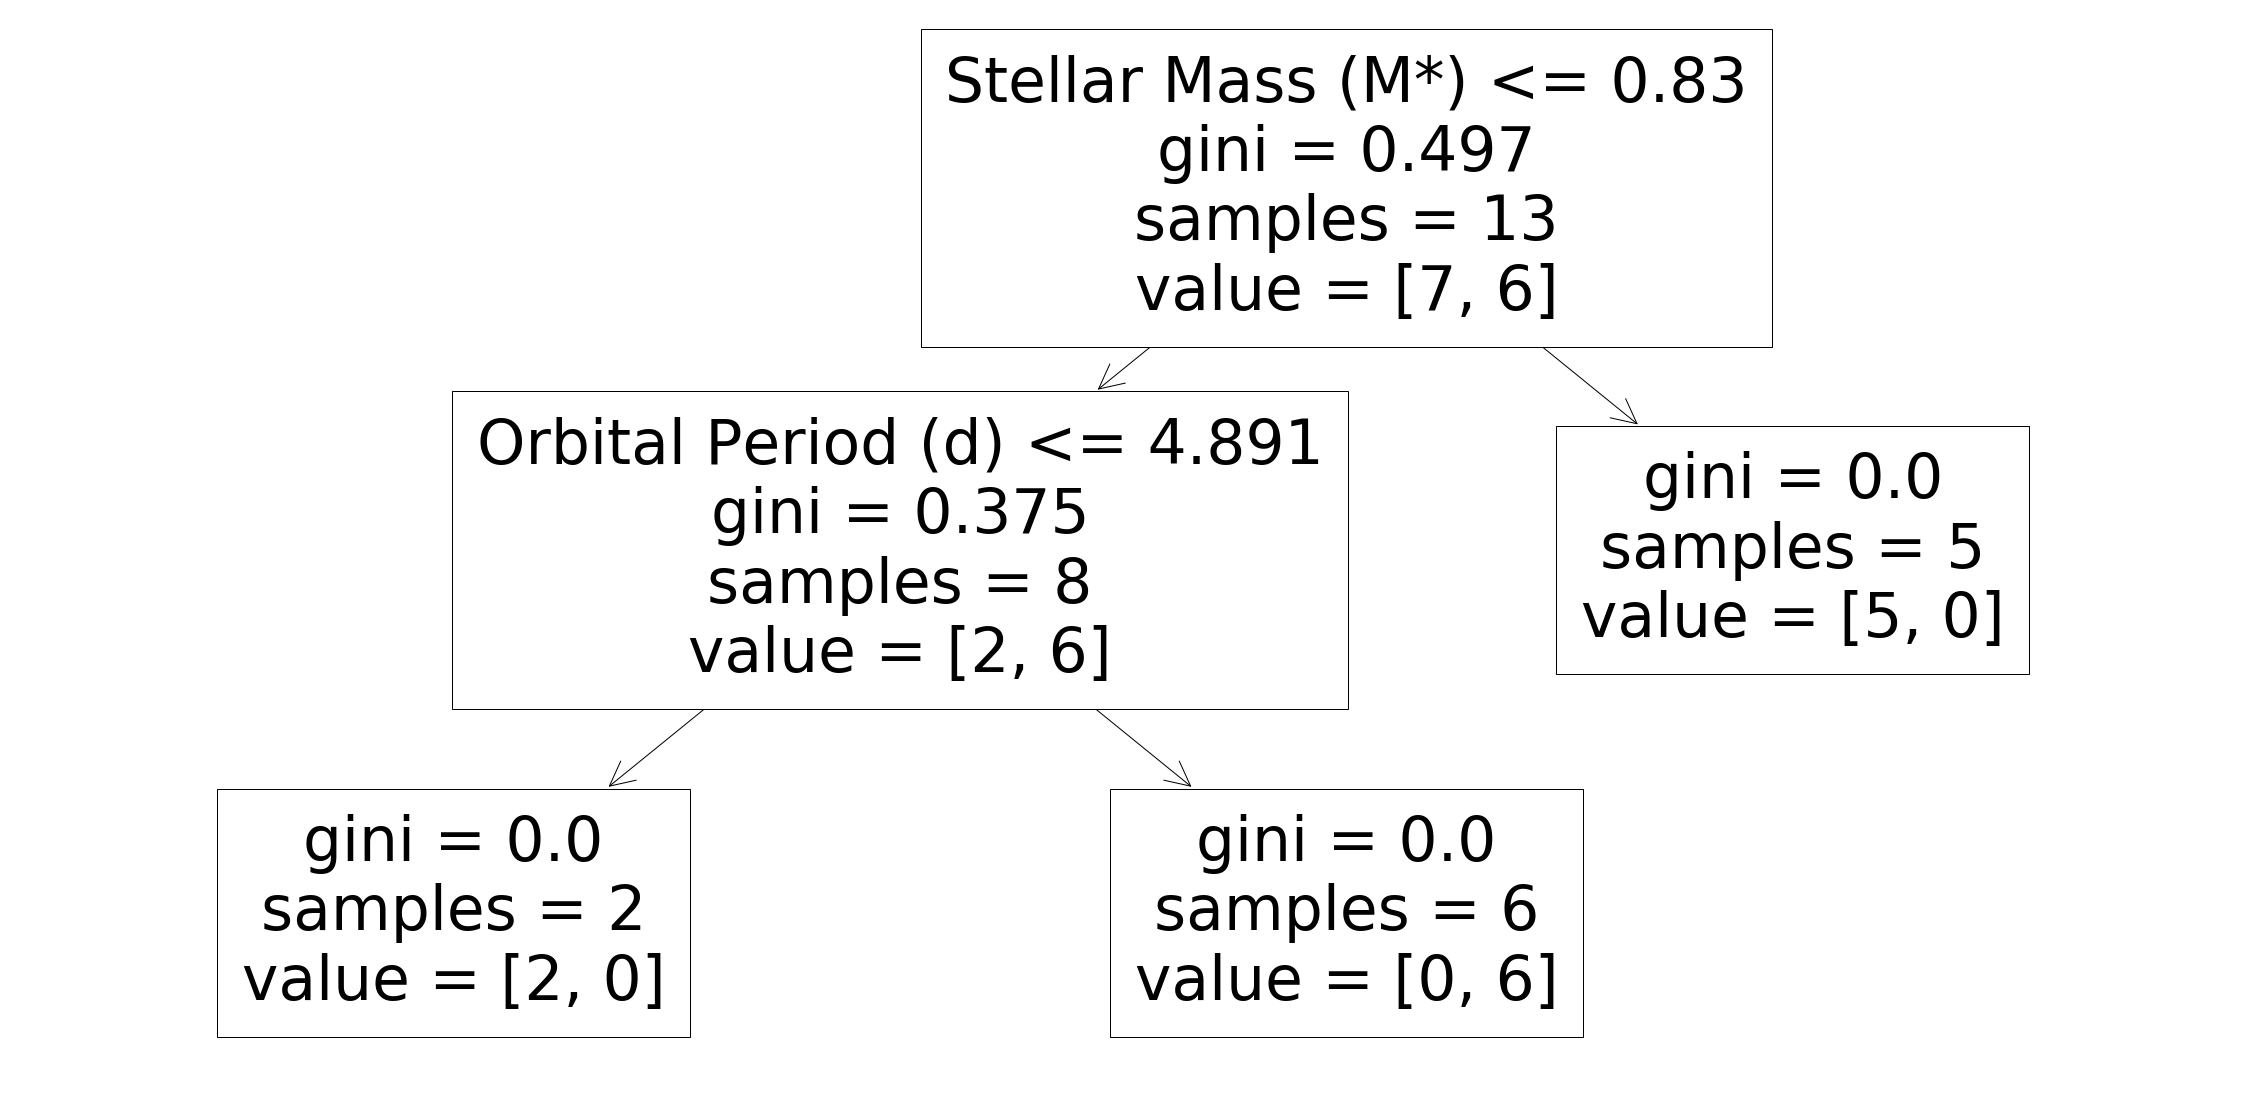

In [11]:

plt.figure(figsize=(40,20))  # customize according to the size of your tree
tree.plot_tree(model, feature_names = ['Stellar Mass (M*)', 'Orbital Period (d)', 'Distance (AU)'])
plt.show()

### Exercise 3

How good are the final splits? Motivate your answer with the above tree plot.

*student work here*

### We can visualize the splits as well and then answer some questions.

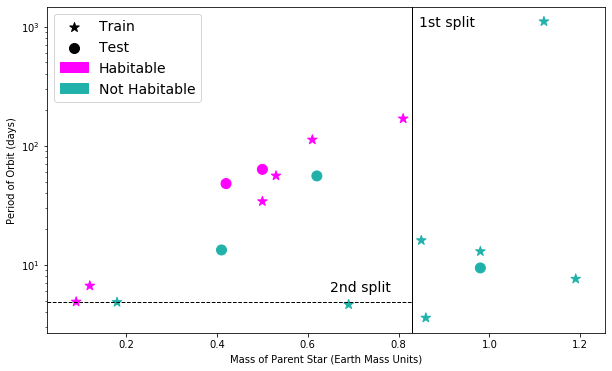

In [12]:
plt.figure(figsize=(10,6))
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#20B2AA','#FF00FF'])
plt.scatter(TrainSet['S_MASS'], TrainSet['P_PERIOD'], marker = '*',\
            c = TrainSet['P_HABITABLE'], s = 100, cmap=cmap, label = 'Train')

plt.scatter(TestSet['S_MASS'], TestSet['P_PERIOD'], marker = 'o',\
            c = TestSet['P_HABITABLE'], s = 100, cmap=cmap, label = 'Test')

plt.yscale('log')
plt.xlabel('Mass of Parent Star (Earth Mass Units)')
plt.ylabel('Period of Orbit (days)');
plt.axvline(x=0.83, linewidth =1, ls = '-', label = '1st split', c='k')
plt.axhline(y=4.891, xmin = 0, xmax = 0.655, linewidth =1, ls = '--', label = '2nd split',c='k')


plt.text(0.845, 10**3, '1st split', fontsize=14)
         
plt.text(0.65, 6, '2nd split', fontsize=14)

bluepatch = mpatches.Patch(color='#20B2AA', label='Not Habitable')
magentapatch = mpatches.Patch(color='#FF00FF', label='Habitable')

plt.legend();

ax = plt.gca()
leg = ax.get_legend()
leg.legendHandles[2].set_color('k')
leg.legendHandles[3].set_color('k')


plt.legend(handles=[leg.legendHandles[2],leg.legendHandles[3], magentapatch, bluepatch],\
           loc = 'upper left', fontsize = 14)

#plt.savefig('HabPlanets.png', dpi = 300)

### Exercise 4
    
What is the accuracy (percentage of correct classifications) on the training set?

*student work here*

### Exercise 5 
    
How about on the test set (you have to run the test example through the tree, or look at the figure above).

*student work here*

### Our final reflection will be an exercise in picking a different train/test split.

In [13]:
TrainSet2 = LearningSet.iloc[5:,:] #we pick the first 5 objects for test, 5:18 for training

TestSet2 = LearningSet.iloc[:5,:]

### Go through the motion again...

In [14]:
Xtrain2 = TrainSet2.drop(['P_NAME','P_HABITABLE'],axis=1)

Xtest2 = TestSet2.drop(['P_NAME','P_HABITABLE'],axis=1)

ytrain2 = TrainSet2.P_HABITABLE

ytest2 = TestSet2.P_HABITABLE

### And we are ready to fit the model again with our decision tree!

model = DecisionTreeClassifier(random_state=3)

model.fit(Xtrain2,ytrain2)

DecisionTreeClassifier(random_state=3)

### Exercise 6 

We can now visualize the new tree. Use the tree.plot call above to visualize this new tree. Do you need to change the parameters any?

In [16]:
# student work here



### Exercise 7 

How many splits does this require? What is the accuracy on the training set?

*student work here*

### Exercise 8

Plot the splits on the left side of the tree (those involving mass or period) in the plot below:

HINT: use plt.vlines(x,ymin,ymax) for vertical lines and plt.hlines(y,xmin,ymax)
But make sure the lines can be distinguished from each other and label them with "1st split" etc.

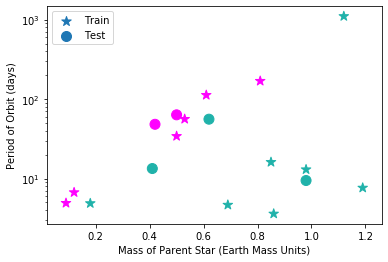

In [17]:
plt.scatter(TrainSet['S_MASS'], TrainSet['P_PERIOD'], marker = '*',\
            c = TrainSet['P_HABITABLE'], s = 100, cmap=cmap, label = 'Train')

plt.scatter(TestSet['S_MASS'], TestSet['P_PERIOD'], marker = 'o',\
            c = TestSet['P_HABITABLE'], s = 100, cmap=cmap, label = 'Test')

# student work here
# draw the lines of the splits

plt.legend()
plt.yscale('log')
plt.xlabel('Mass of Parent Star (Earth Mass Units)')
plt.ylabel('Period of Orbit (days)')
plt.show()

### As you can see, this is quite different from the one we had before!

### Exercise 9

What is the accuracy (percentage of correct classifications) on the training set?

*student work here*

### Exercise 10 (BONUS)

What is the accuracy (percentage of correct classifications) on the *test* set?

*student work here*